<a href="https://colab.research.google.com/github/KK-SD/Exploratory-Data-Analysis/blob/main/Regression_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.datasets import fetch_california_housing

from sklearn.linear_model import LinearRegression, Ridge

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.pipeline import make_pipeline

In [123]:
# Load the California Housing dataset
data = fetch_california_housing()

data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [124]:
df = pd.DataFrame(data.data, columns=data.feature_names)

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [126]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


In [127]:
# Add target to the price column

df['Price'] = data.target


In [128]:
from re import X

# Define features and target

x = df.drop('Price', axis=1)

y = df['Price']

In [129]:
# Split into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


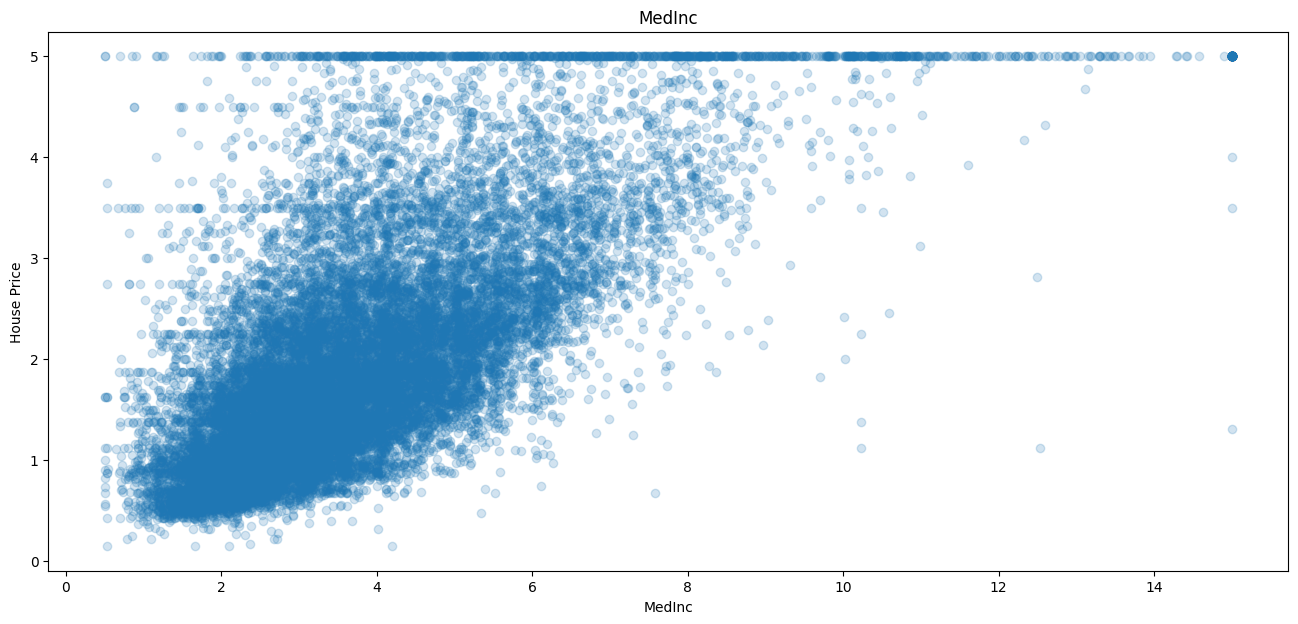

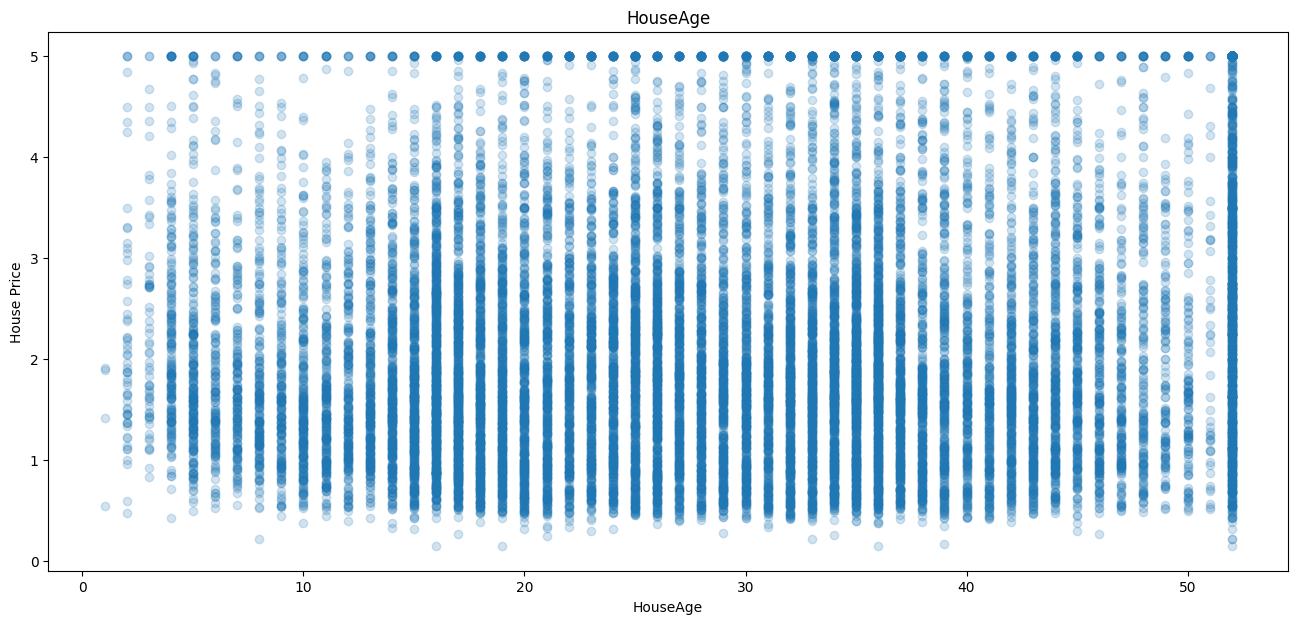

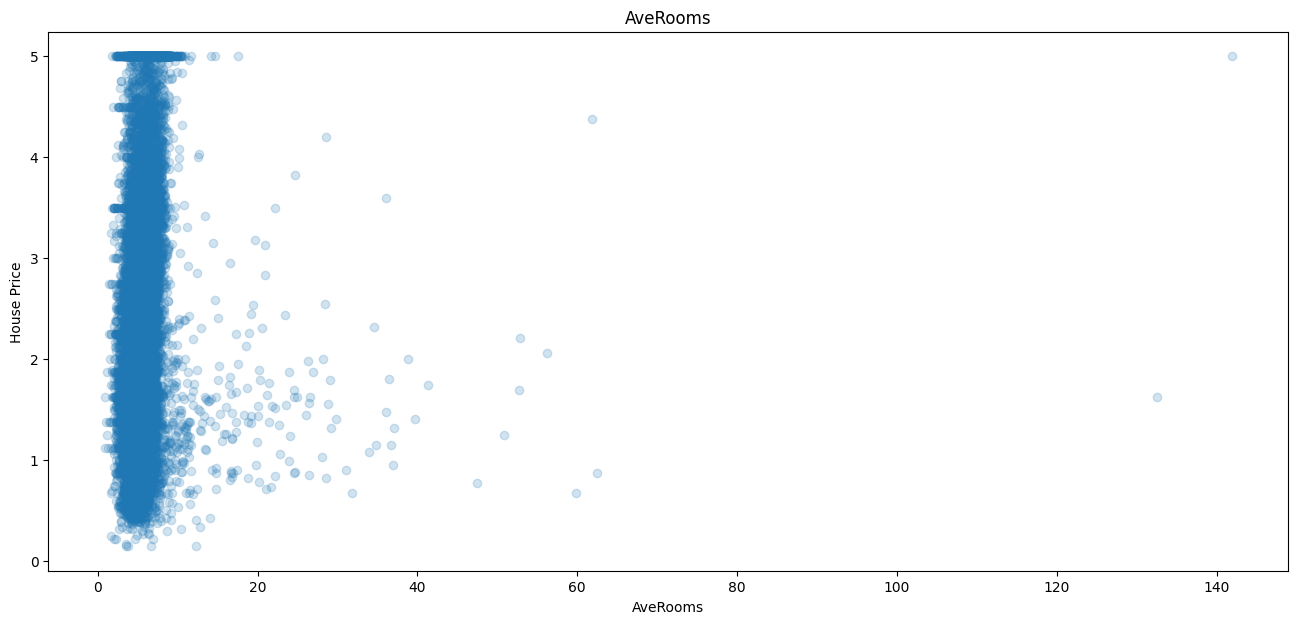

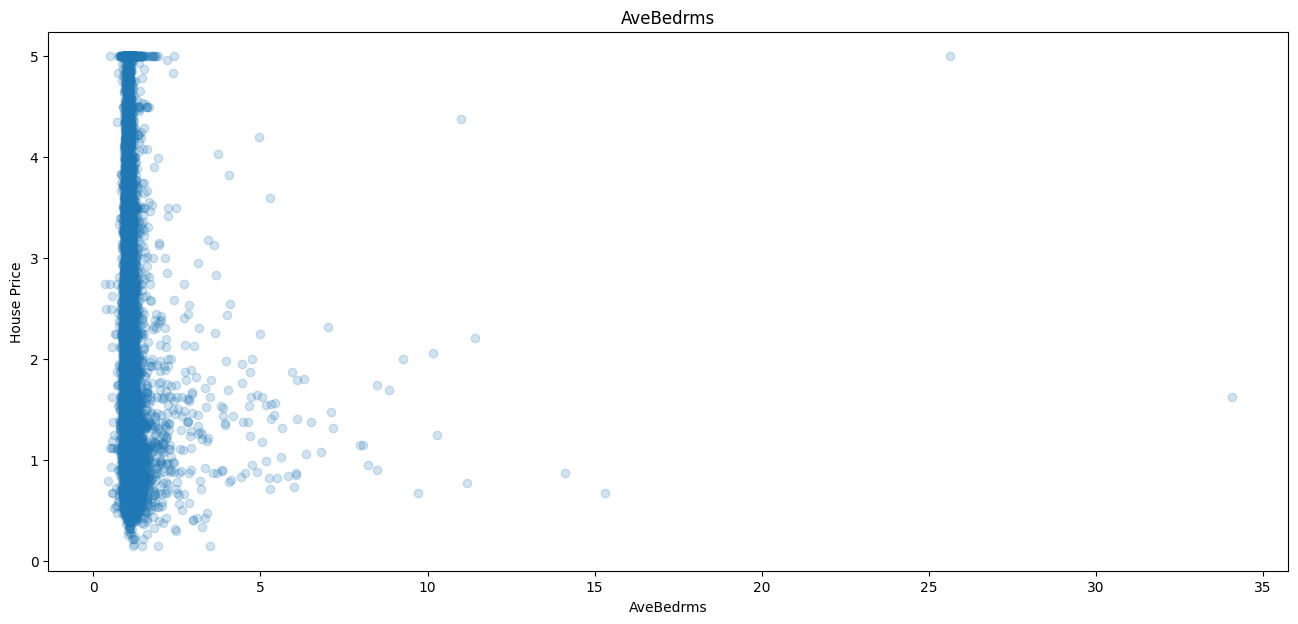

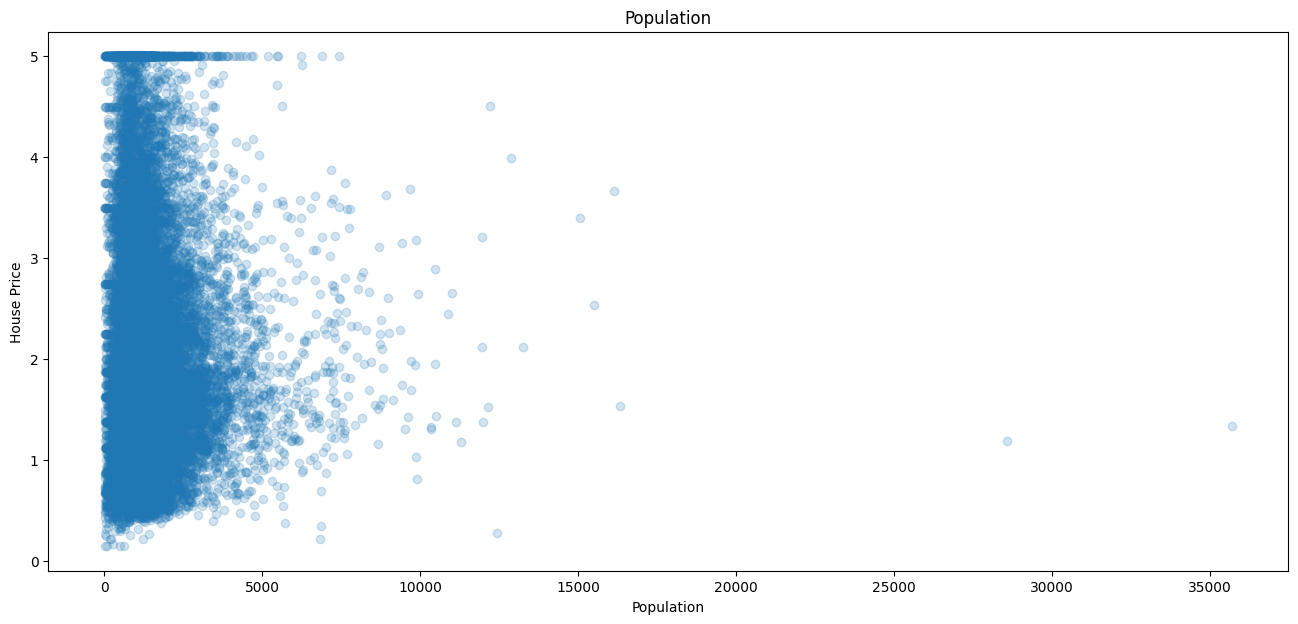

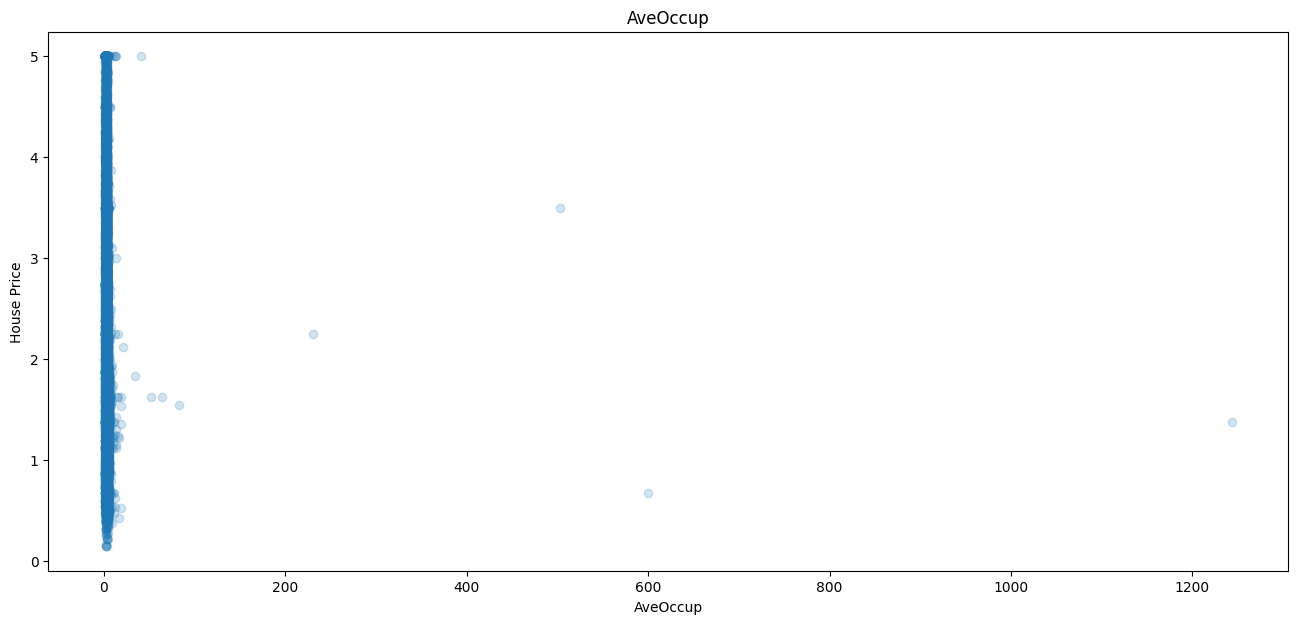

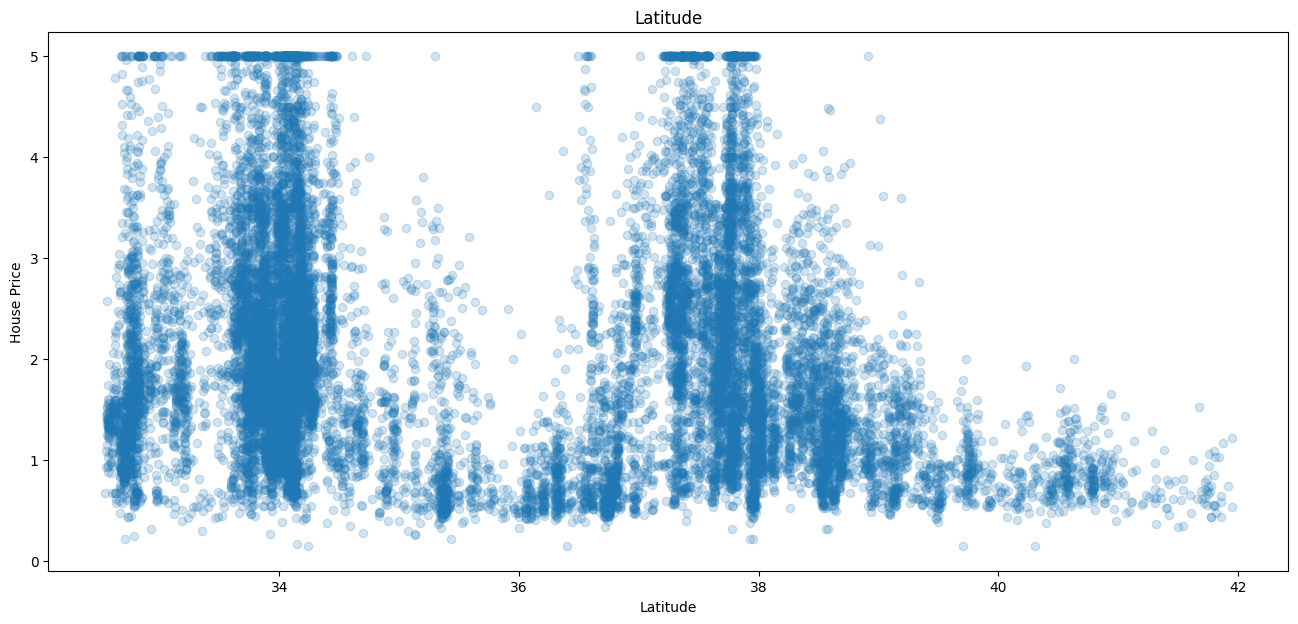

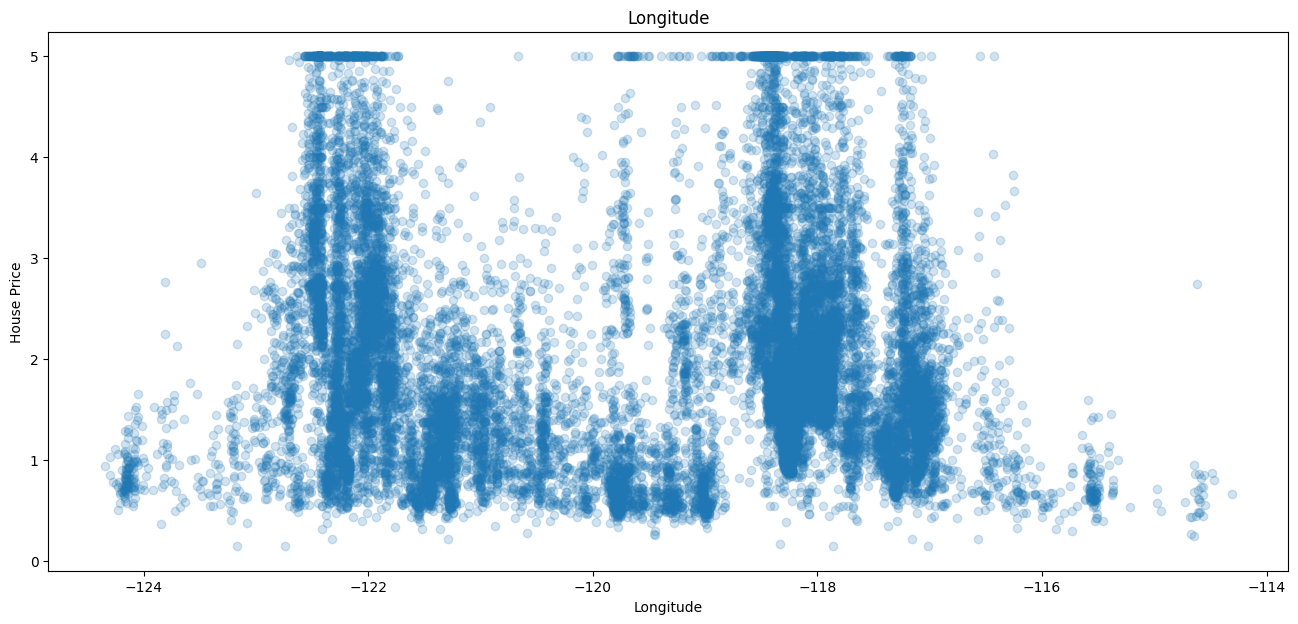

In [131]:
import matplotlib.pyplot as plt

for i in range(x.shape[1]):

    plt.figure(figsize=(16, 7))

    plt.scatter(x.iloc[:, i], y, alpha=0.2)

    plt.title(data.feature_names[i])

    plt.xlabel(data.feature_names[i])

    plt.ylabel('House Price')

    plt.show()


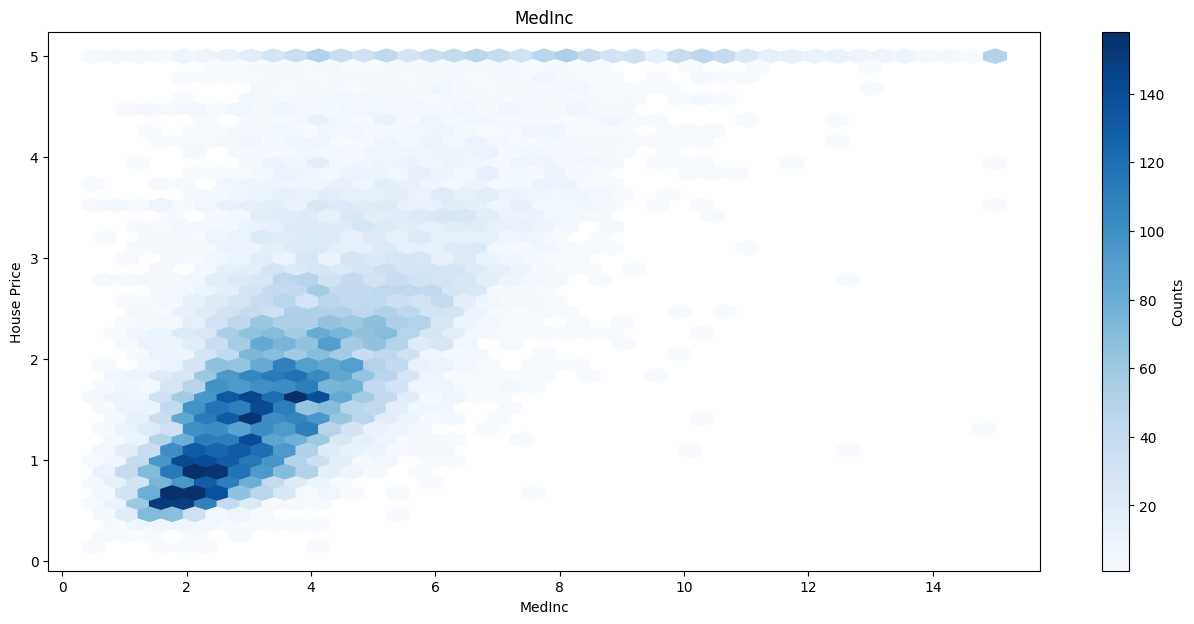

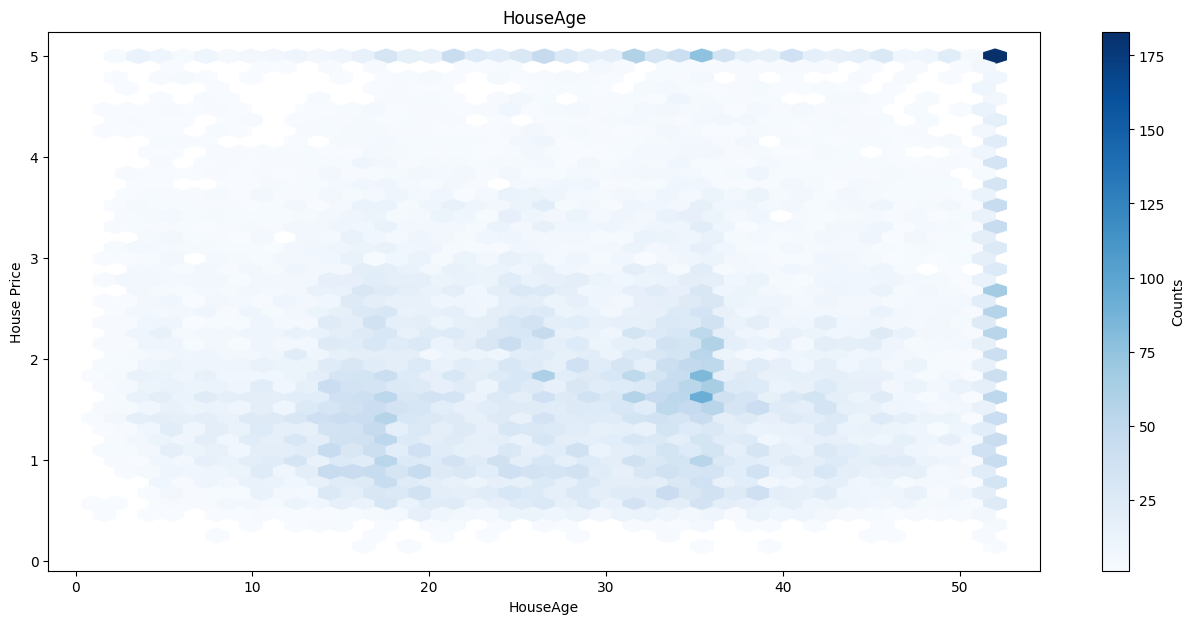

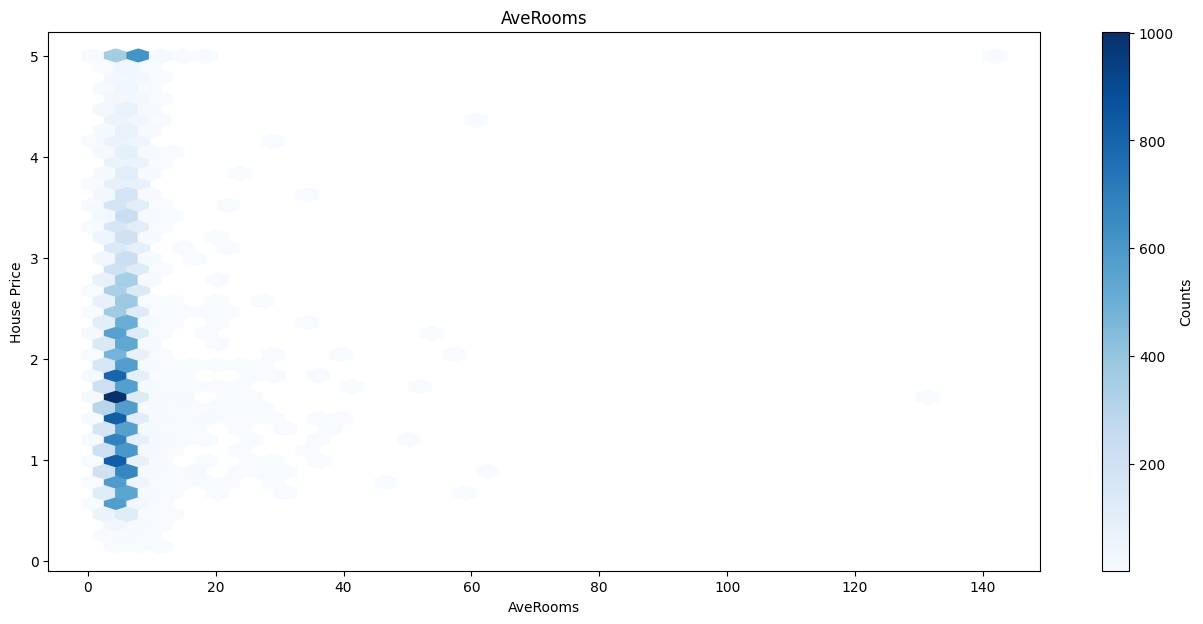

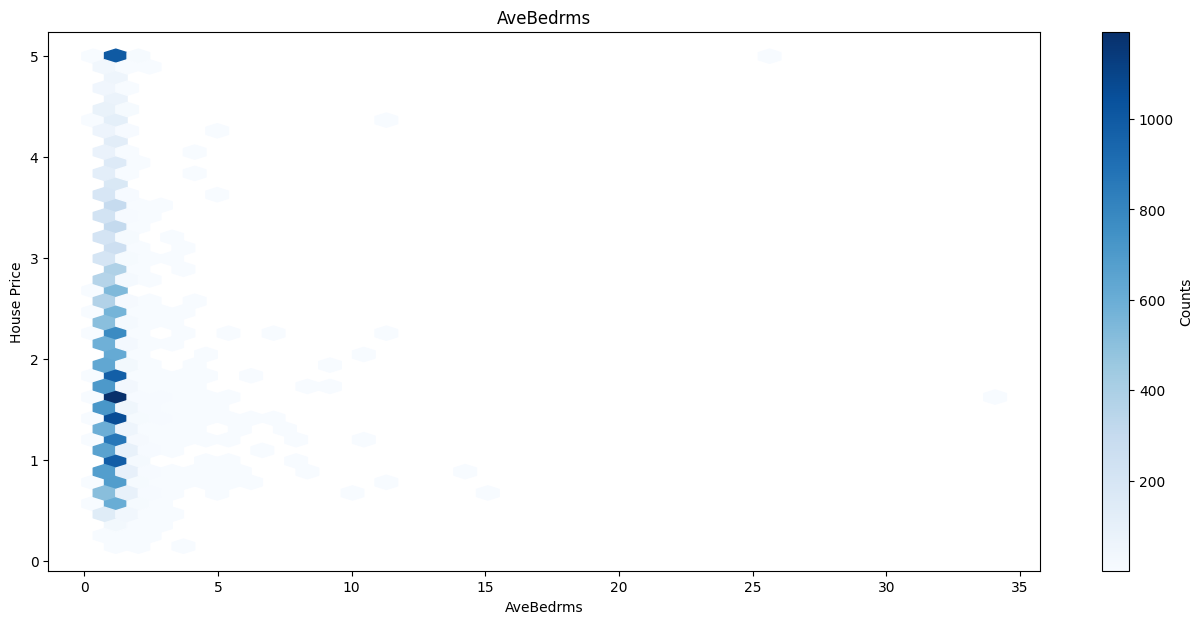

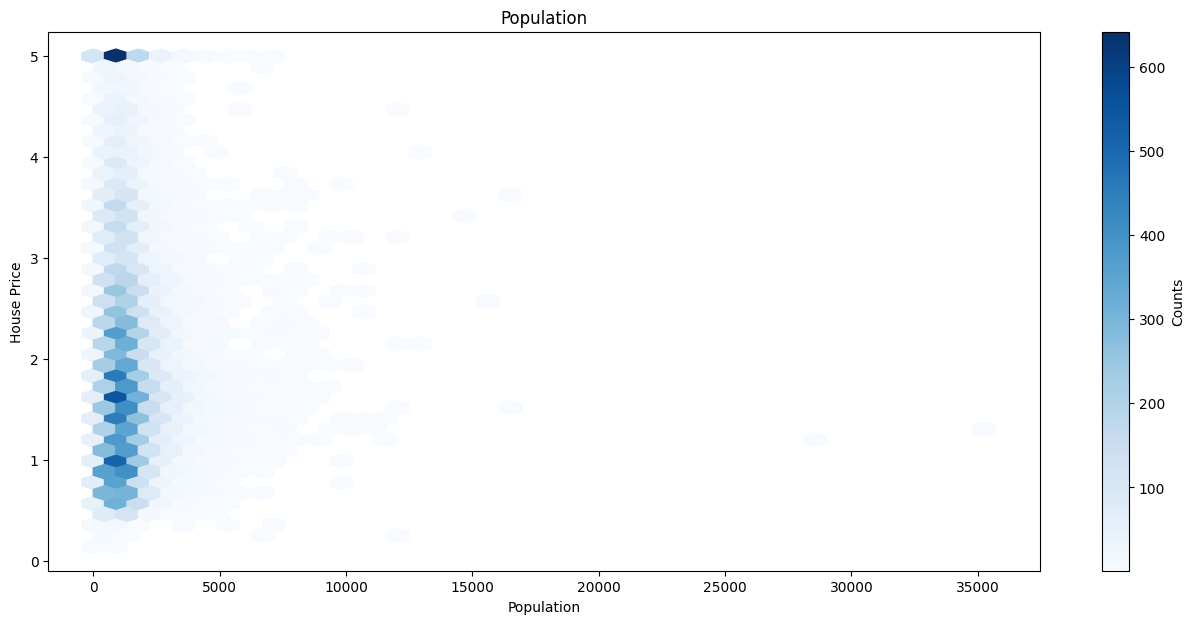

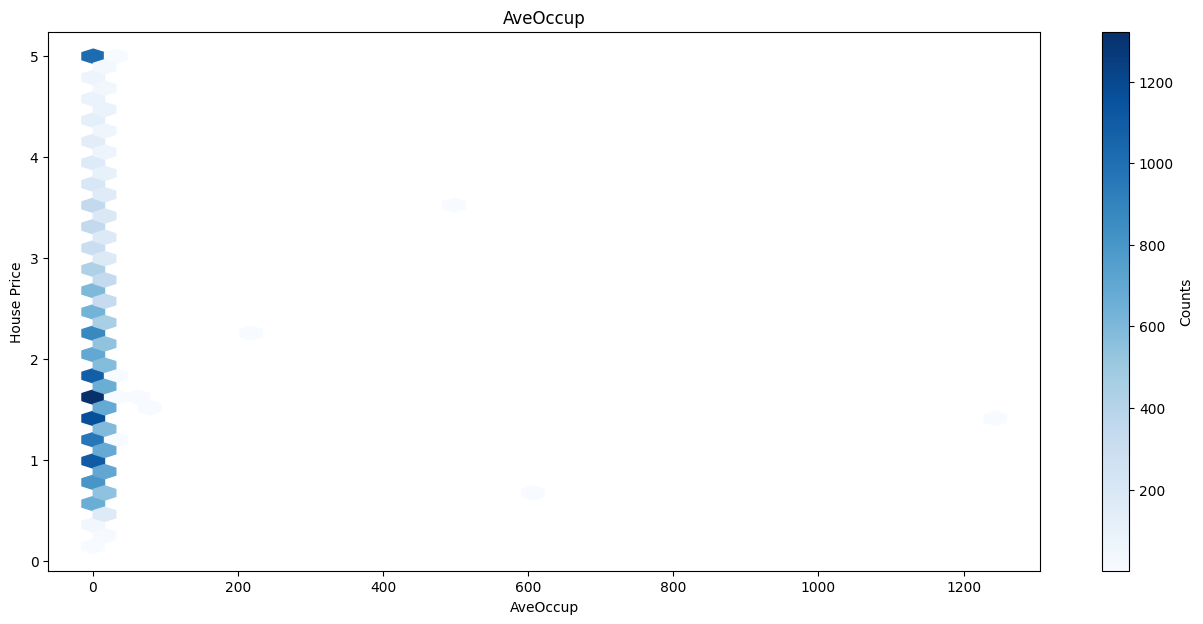

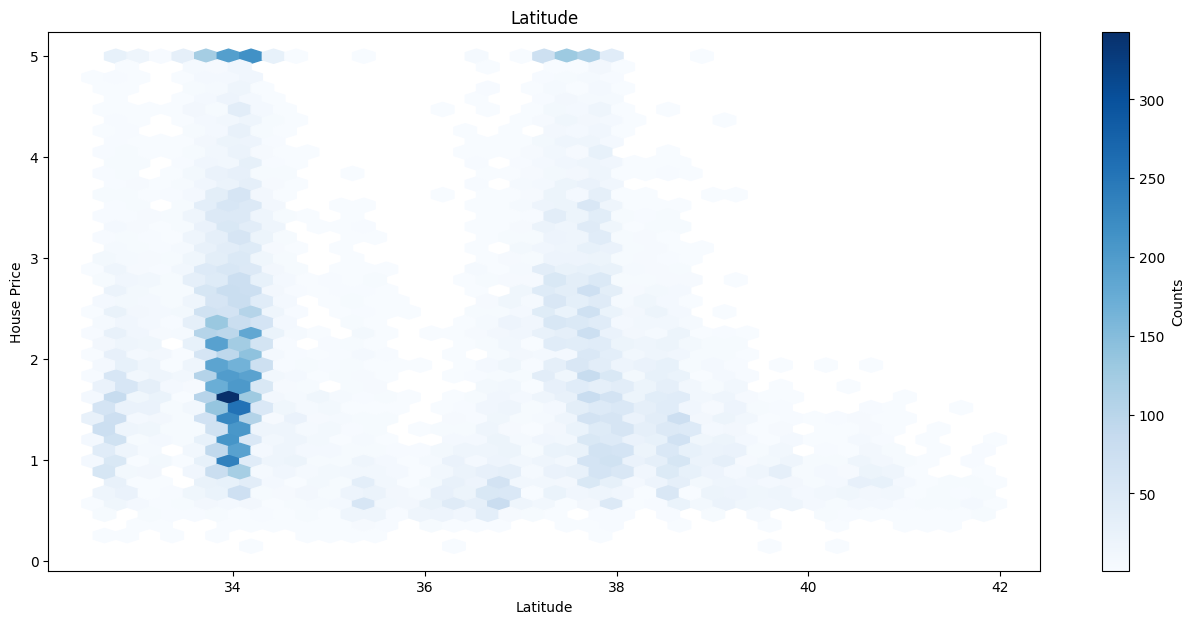

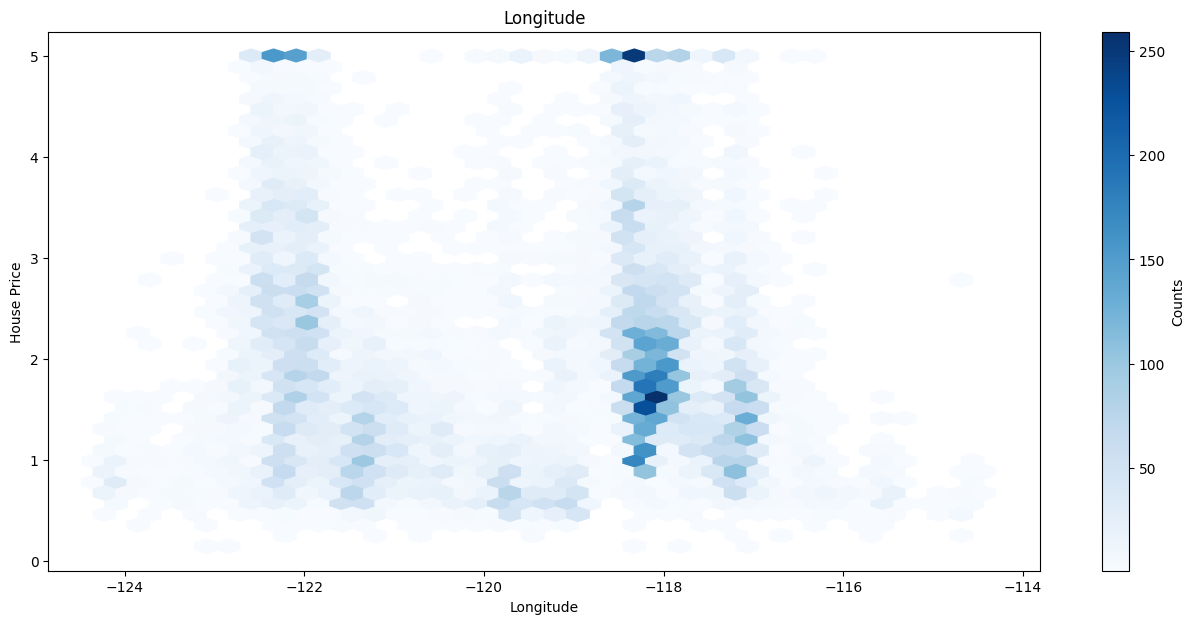

In [132]:
for i in range(x.shape[1]):

    plt.figure(figsize=(16, 7))

    hb = plt.hexbin(x.iloc[:, i], y, gridsize=40, cmap='Blues', mincnt=1)

    plt.colorbar(hb, label='Counts')

    plt.title(data.feature_names[i])

    plt.xlabel(data.feature_names[i])

    plt.ylabel('House Price')

    plt.show()


In [133]:
#Linear Regression model

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)  # Train model

y_pred_lin = lin_reg.predict(x_test)  # Predict on test set

In [134]:
# Evaluate Linear Regression
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

In [135]:
print("---------------------------------------------------------")

print("Linear Regression Results:")

print("---------------------------------------------------------")

print("Mean Squared Error:",mse_lin)

print("---------------------------------------------------------")

print("R-squared:",r2_lin)

print("---------------------------------------------------------")

---------------------------------------------------------
Linear Regression Results:
---------------------------------------------------------
Mean Squared Error: 0.5478674513641614
---------------------------------------------------------
R-squared: 0.5911036860066134
---------------------------------------------------------


In [136]:
# Polynomial Regression model (degree 2)

poly = PolynomialFeatures(degree=2, include_bias=False)

x_train_poly = poly.fit_transform(x_train)

x_test_poly = poly.transform(x_test)

poly_reg = LinearRegression()

# Train model on polynomial features

poly_reg.fit(x_train_poly, y_train)

# Predict on test set

y_pred_poly = poly_reg.predict(x_test_poly)

In [137]:
# Evaluate Polynomial Regression

mse_poly = mean_squared_error(y_test, y_pred_poly)

r2_poly = r2_score(y_test, y_pred_poly)

In [138]:
print("---------------------------------------------------------")

print("Polynomial Regression Model Results:")

print("---------------------------------------------------------")

print("Mean Squared Error:",mse_poly)

print("---------------------------------------------------------")

print("R-squared:",r2_poly)

print("---------------------------------------------------------")

---------------------------------------------------------
Polynomial Regression Model Results:
---------------------------------------------------------
Mean Squared Error: 0.5309223707345775
---------------------------------------------------------
R-squared: 0.6037505059491111
---------------------------------------------------------


Text(0.5, 1.0, 'Linear Regression Predictions')

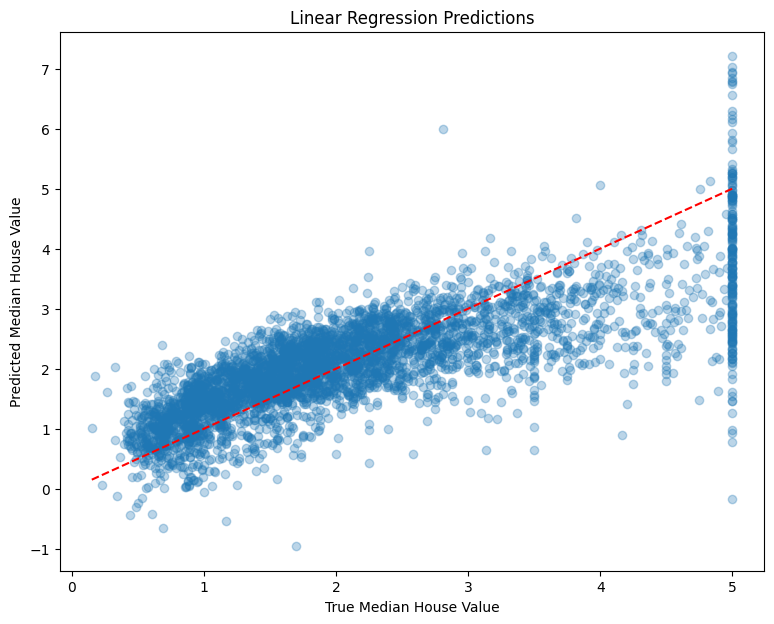

In [139]:
# Plot predictions vs true for Linear Regression
plt.figure(figsize=(20,7))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # perfect prediction line
plt.xlabel('True Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Linear Regression Predictions')

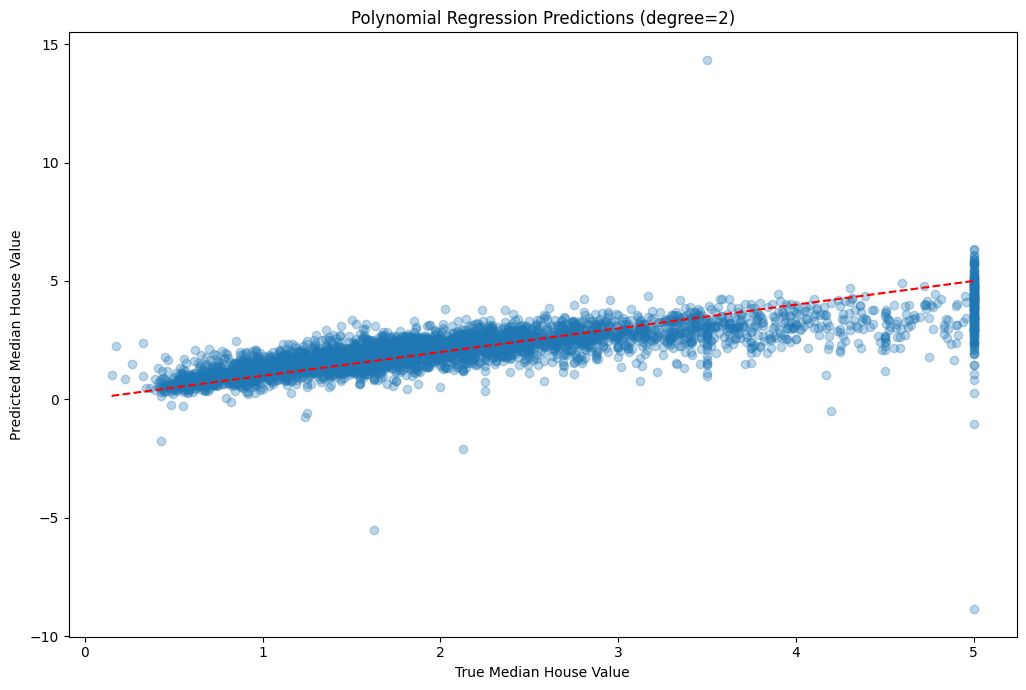

In [140]:
# Plot predictions vs true for Polynomial Regression
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # perfect prediction line
plt.xlabel('True Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Polynomial Regression Predictions (degree=2)')

plt.tight_layout()
plt.show()